# Star Wars Survey
---

The aim of the following project is to find out which Star Wars movie is the best of the bunch. We would like to also investigate some patterns among respondents, for example whether fans ranked the movies better than people who did not consider themselves as fans. Furthermore, we would like to get to know who do respondents consider the most controversial character.

The list of Star Wars movies can be found [here](https://en.wikipedia.org/wiki/List_of_Star_Wars_films).

The team at Five ThirtyEight surveyed Star Wars fans and collected useful data that will be used in this project. The data can be found on the team [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).



## Data Set Overview

We will begin with reading in the data set and doing some initial exploration. We would like to see if there are any quirks easily visible.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
# Reading in Star Wars survey data set
star_wars = pd.read_csv('projects_dq\\star_wars.csv', encoding='ISO-8859-1')

In [2]:
# Reviewing the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The most important columns the data includes, are:
- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Education - The respondent's education level
- Age - The respondent's age
- Location (Census Region) - The respondent's location
- Household Income - The respondent's income
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

In [3]:
# Returning first rows of the data set
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

At first glance we can notice that RespondentID column is incomplete. We will skip the missing rows.

In [5]:
# Removing rows with missing content 
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

## Cleaning and Mapping

The columns stating questions could be synthesized and include more simple answers. In the following part of the project we will work with columns and possible answers.

In [6]:
# Mapping for Boolean Types
yes_no = {"Yes": True, "No": False, "NaN": 'No Answer'}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
# Constructing a mapping dictionary
sw_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

# Mapping columns from Star Wars data set
for column in star_wars.columns[3:9]:
    star_wars[column] = star_wars[column].map(sw_mapping)

In [8]:
# Renaming columns
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The columns below have difficult to understand answers. We would like to give each column a more descriptive name.

In [9]:
# Viewing ranking columns
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


The columns indicate the following:
- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - informs how much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - informs how much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - informs how much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - informs how much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - informs how much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - informs how much the respondent liked Star Wars: Episode VI Return of the Jedi

In [10]:
# Converting columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [26]:
# Renaming columns
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Finally we know how the respondents assessed the movies. The futher step will be to investigate, which movie got the best result. We will compute mean for every column.

In [12]:
# Calculating mean
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

The third movie, which is linked to Star Wars: Episode III Revenge of the Sith scored the lowest result among our respondents. The scale is from 1 to 6 (1 is the highest grade and 6 is the lowest). Let's visualize the data to see it clearly.

Text(0, 0.5, 'Mean Result')

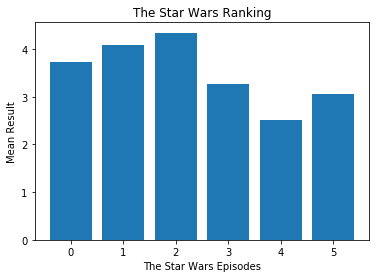

In [13]:
# Importing library
%matplotlib inline
import matplotlib.pyplot as plt

# Plotting a bar plot
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title('The Star Wars Ranking')
plt.xlabel('The Star Wars Episodes')
plt.ylabel('Mean Result')

On average, Episode V The Empire Strikes Back was most liked among Star Wars Movies. Least liked was Episode III Revenge of the Sith. 

## Finding the Most Viewed Movie

Earlier on in our project we converted column `'Have you seen any of the 6 films in the Star Wars franchise?'` to Bolean type. We will count how many times `'True'` has been selected.

In [14]:
# Finding the number of respondents who have seen some movie from the bunch
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [15]:
# Rechecking the number of rows
star_wars.shape

(1186, 38)

As we can see in our data set all respondents have seen at least one movie from the bunch. We will check if it is the case for every seperate movie.

In [16]:
# Calculating the number of respondents who have seen particular episodes
print('Star Wars: Episode I The Phantom Menace: ', star_wars['seen_1'].sum())
print('Star Wars: Episode II Attack of the Clones: ', star_wars['seen_2'].sum())
print('Star Wars: Episode III Revenge of the Sith: ', star_wars['seen_3'].sum())
print('Star Wars: Episode IV A New Hope: ', star_wars['seen_4'].sum())
print('Star Wars: Episode V The Empire Strikes Back: ', star_wars['seen_5'].sum())
print('Star Wars: Episode VI Return of the Jedi: ', star_wars['seen_6'].sum())


Star Wars: Episode I The Phantom Menace:  673
Star Wars: Episode II Attack of the Clones:  571
Star Wars: Episode III Revenge of the Sith:  550
Star Wars: Episode IV A New Hope:  607
Star Wars: Episode V The Empire Strikes Back:  758
Star Wars: Episode VI Return of the Jedi:  738


Unsurprisingly, Episode V The Empire Strikes Back is the most viewed movie. To better see that, we will visualize that.

Text(0, 0.5, 'Mean Result')

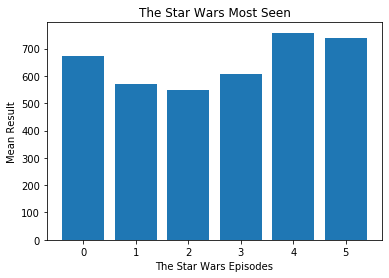

In [17]:
# Plotting a bar plot
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
plt.title('The Star Wars Most Seen')
plt.xlabel('The Star Wars Episodes')
plt.ylabel('Mean Result')

As mentioned, it is clear to see that the Episode V The Empire Strikes Back is the most popular episode among the Star Wars movies. What we can see correlates with the rankings results that we investigated earlier on.

## Segmenting the Data

Another interesting investigation could regard examing how certain segments of the survey population responded. We can build groups based on following criteria:
- respondends who considered themselves to be a fan of the Star Wars film franchise,
- respondends who considered themselves to be a fan of the Star Trek film franchise,
- renpondends' gender.

In [18]:
# Finding out the number of fans
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
False    641
True     427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64


Among our respondends there are more people who are the Star Wars fans - 552, and less people who are fans of the Star Trek - 427. Let's compare what will be the Star Wars ranking in case of fans.

### Fans and Other Respondents

Text(0, 0.5, 'Mean Result')

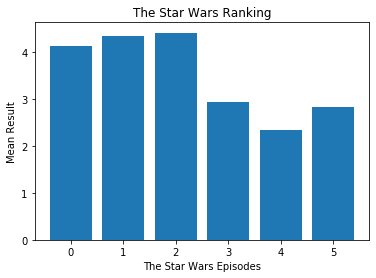

In [19]:
# Assigning only fans to a variable
star_wars_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]

# Plotting a bar plot
plt.bar(range(6), star_wars_fans[star_wars_fans.columns[9:15]].mean())
plt.title('The Star Wars Ranking')
plt.xlabel('The Star Wars Episodes')
plt.ylabel('Mean Result')

Text(0, 0.5, 'Mean Result')

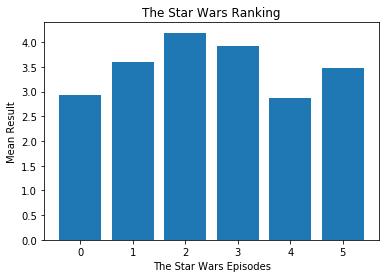

In [20]:
# Assigning respondents who do not consider themselves fans to a variable
star_wars_no_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

# Plotting a bar plot
plt.bar(range(6), star_wars_no_fans[star_wars_no_fans.columns[9:15]].mean())
plt.title('The Star Wars Ranking')
plt.xlabel('The Star Wars Episodes')
plt.ylabel('Mean Result')

Interestingly, respondents who do not consider themselves fans assessed Episodes I and II better than actual fans. Episode III has been ranked similarly in case of both fans and the other respondents. However, in case of further episodes we can notice that fans assessed the movies better.

### Gender Among Respondents

Now let's check if there are any differences in seen and ranking of the movies caused by gender. We'll start by splitting the 'Gender' column.

In [21]:
# Splitting columns on the gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [22]:
grouped = star_wars.groupby('Gender')
seen_grouped = grouped[star_wars.columns[3:9]]
seen_mean = seen_grouped.sum()
print(seen_mean)

        seen_1  seen_2  seen_3  seen_4  seen_5  seen_6
Gender                                                
Female   298.0   237.0   222.0   255.0   353.0   338.0
Male     361.0   323.0   317.0   342.0   392.0   387.0


Looking at average results, not as many women tend to saw the Star Wars movies as men. We will visualize the data to see it clearly.

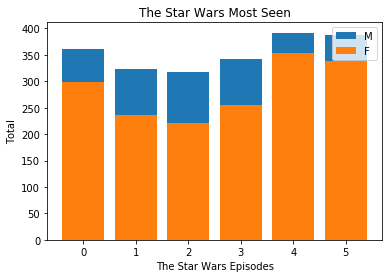

In [23]:
# Plotting a bar plot
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.bar(range(6), females[females.columns[3:9]].sum())
plt.title('The Star Wars Most Seen')
plt.xlabel('The Star Wars Episodes')
plt.ylabel('Total')
plt.legend('MF')

We can observe that all Star Wars movies are more popular among men. We will see how is looks like in case of ranking.

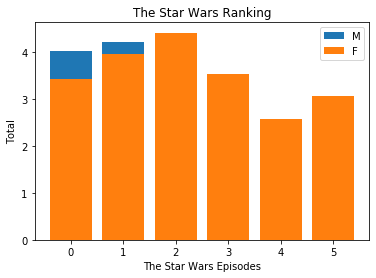

In [24]:
# Plotting a bar plot
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.bar(range(6), females[females.columns[9:15]].mean())
plt.title('The Star Wars Ranking')
plt.xlabel('The Star Wars Episodes')
plt.ylabel('Total')
plt.legend('MF')

Both genders assessed the Star Wars movies similarly. There are no big differences, although women are more likely to assess these movies better.

## The Most Controversial Character

We would like to know who do respondents like the most, the least and finally, most interestinglly, which character is the most controversial. 
We will investigate the answers in `'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'` column.

In [25]:
star_wars.iloc[:, 15:29].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [31]:
# Renaming columns
star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia Organa",
        "Unnamed: 18": "Anakin Skywalker",
        "Unnamed: 19": "Obi Wan Kenobi",
        "Unnamed: 20": "Emperor Palpatine",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrsissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2 D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme Amidala",
        "Unnamed: 28": "Yoda"
        })

star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrsissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [41]:
# Constructing a mapping dictionary
char_mapping = {
    "Very favorably": True,
    "Somewhat favorably": True,
    "Neither favorably nor unfavorably (neutral)": False,
    "Somewhat unfavorably": False,
    "Unfamiliar (N/A)": False,
    "Very unfavorably": False,
    np.NaN: False
}

# Mapping columns from Star Wars data set
for column in star_wars.columns[15:29]:
    star_wars[column] = star_wars[column].map(char_mapping)

In [44]:
# Converting columns to float type
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].astype(float)

In [56]:
# Calculating mean
star_wars[star_wars.columns[15:29]].sum().sort_values(ascending=False)

Luke Skywalker          771.0
Han Solo                761.0
Princess Leia Organa    757.0
Obi Wan Kenobi          750.0
Yoda                    749.0
R2 D2                   747.0
C-3P0                   703.0
Anakin Skywalker        514.0
Darth Vader             481.0
Lando Calrsissian       365.0
Padme Amidala           351.0
Boba Fett               291.0
Emperor Palpatine       253.0
Jar Jar Binks           242.0
dtype: float64

The most liked characters include: Luke Skywalker, Han Solo and Princess Leia Organa. The respondends seem to dislike the most Jar Jar Binks. The most controvercial character should be somewhere in the middle, most probably it is Anakin Skywalker or Darth Vader.

# Conclusions
---


Undoubtedly, the best Star Wars movie according to our respondents is Episode V The Empire Strikes Back.

Interestingly, respondents who do not consider themselves fans assessed Episodes I and II better than actual fans. Episode III has been ranked similarly in case of both fans and the other respondents. However, in case of further episodes we have noticed that fans assessed the movies better.

Both genders assessed the Star Wars movies similarly. There are no big differences, although women are more likely to assess these movies better.

According to our respondents the most liked character is Luke Sywalker. 